titanic datasını okuyunuz(<b>train.csv</b>). Ödevin geri kalanında dataframe gösterimlerini <b>display()</b> fonksiyonunu kullanarak yapınız.<br> Örn: display(titanic_df)

In [4]:
import numpy as np
import pandas as pd 
from sklearn.impute import SimpleImputer

In [5]:
df_titanic1 = pd.read_csv("train.csv")
display(df_titanic1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Soru 1:

Kazada ölenlerin yaş ortalamasını bulunuz

In [6]:
df_titanic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_titanic1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [87]:
df_titanic1[df_titanic1["Survived"] < 1] 
#kazada ölerinler 0 ile işaretlendiği için 1 den küçük değerler alındı ve kontrol edildi.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
result = df_titanic1[df_titanic1["Survived"] < 1]["Age"].mean()
print("Kazada ölenlerin yaş ortalaması:" ,result)

Kazada ölenlerin yaş ortalaması: 30.62617924528302


Kazada ölenlerin bilet fiyatlarının ortalamasını ve medyanını bulunuz

In [99]:
df_titanic1[df_titanic1["Survived"] < 1]["Fare"] #survived sütunuyla aynı uzunlukta mı kontrolü yapıldı

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64

In [9]:
result_mean = df_titanic1[df_titanic1["Survived"] < 1]["Fare"].mean()
result_median = df_titanic1[df_titanic1["Survived"] < 1]["Fare"].median()
print("Kazada ölenlerin bilet fiyatları ortalaması:" ,result_mean)
print("Kazada ölenlerin bilet fiyatları medyanı:" ,result_median)

Kazada ölenlerin bilet fiyatları ortalaması: 22.117886885245877
Kazada ölenlerin bilet fiyatları medyanı: 10.5


Kazada ölen erkeklerin yaş ortalamasını bulunuz


In [116]:
df_titanic1[(df_titanic1["Survived"] < 1) & (df_titanic1["Sex"] == "male")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [118]:
result = df_titanic1[(df_titanic1["Survived"] < 1) & (df_titanic1["Sex"] == "male")]["Age"].mean()
print("Kazada ölen erkeklerin yaş ortalaması:", result)

Kazada ölen erkeklerin yaş ortalaması: 31.618055555555557


Kazada ölen Kadınların yaş ortalamasını bulunuz

In [10]:
result = df_titanic1[(df_titanic1["Survived"] < 1) & (df_titanic1["Sex"] == "female")]["Age"].mean()
print("Kazada ölen kadınların yaş ortalaması:", result)

Kazada ölen kadınların yaş ortalaması: 25.046875


# Soru 2:

Kazadan kurtulanların yaş ortalamasını bulunuz

In [119]:
result = df_titanic1[df_titanic1["Survived"] > 0]["Age"].mean()
print("Kazadan kurtulanların yaş ortalaması:" ,result)

Kazadan kurtulanların yaş ortalaması: 28.343689655172415


Kazadan kurtulanların bilet fiyatlarının ortalamasını bulunuz


In [120]:
result_mean = df_titanic1[df_titanic1["Survived"] > 0]["Fare"].mean()
result_median =  df_titanic1[df_titanic1["Survived"] > 0]["Fare"].median()
print("Kazadan kurtulanların yaş ortalaması:" ,result_mean)
print("Kazadan kurtulanların yaş ortalaması:" ,result_median)

Kazadan kurtulanların yaş ortalaması: 48.39540760233917
Kazadan kurtulanların yaş ortalaması: 26.0


Kazadan kurtulan toplam kişi sayısını bulunuz

In [6]:
result = df_titanic1[df_titanic1["Survived"] > 0]["Survived"].index
len=len(result)
print("Kazadan kurtulan toplam kişi sayısı:", len)

Kazadan kurtulan toplam kişi sayısı: 342


Kazadan kurtulan erkeklerin yaş ortalamasını bulunuz

In [11]:
df_titanic1[(df_titanic1["Survived"] > 0) & (df_titanic1["Sex"] == "male")]["Age"]

17      NaN
21     34.0
23     28.0
36      NaN
55      NaN
       ... 
838    32.0
839     NaN
857    51.0
869     4.0
889    26.0
Name: Age, Length: 109, dtype: float64

In [131]:
result = df_titanic1[(df_titanic1["Survived"] > 0) & (df_titanic1["Sex"] == "male")]["Age"].mean()
print("Kazadan kurtulan erkeklerin yaş ortalaması:", result)

Kazadan kurtulan erkeklerin yaş ortalaması: 27.276021505376345


Kazadan kurtulan kadınların yaş ortalamasını bulunuz

In [130]:
result = df_titanic1[(df_titanic1["Survived"] > 0) & (df_titanic1["Sex"] == "female")]["Age"].mean()
print("Kazadan kurtulan kadınların yaş ortalaması:", result)

Kazadan kurtulan kadınların yaş ortalaması: 28.84771573604061


# Soru 3: 

10 yaşından küçüklerin bilet fiyatlarının medyan değerini bulunuz

In [13]:
df_titanic1[df_titanic1["Age"] < 10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C


In [163]:
df_titanic1[df_titanic1["Age"] < 10]["Fare"].median()

27.0

10 yaşından büyüklerin bilet fiyatlarının medyan değerini bulunuz

In [14]:
df_titanic1[df_titanic1["Age"] > 10]["Fare"].median()

13.92915

# Soru 5:

1.sınıf, 2.sınıf ve 3.sınıf yolcuların ölüm oranlarını karşılaştırınız. Bir veya bir kaç cümle ile sonucu <b>yorumlayınız.</b>


In [39]:
sinif1 = df_titanic1[df_titanic1["Pclass"] == 1].index
sinif1_top = len(sinif1)
sinif1_olen = df_titanic1[(df_titanic1["Pclass"] == 1 )& (df_titanic1["Survived"]<1)].index
sinif1_olenTop = len(sinif1_olen)
olumOranı_sinif1 = (sinif1_olenTop/sinif1_top)*100
print("1.sınıf yolucların ölüm oranı: %"+ str(olumOranı_sinif1))


1.sınıf yolucların ölüm oranı: %37.03703703703704


In [42]:
sinif2 = df_titanic1[df_titanic1["Pclass"] == 2].index
sinif2_top = len(sinif2)
sinif2_olen = df_titanic1[(df_titanic1["Pclass"] == 2 )& (df_titanic1["Survived"]<1)].index
sinif2_olenTop = len(sinif2_olen)
olumOranı_sinif2 = (sinif2_olenTop/sinif2_top)*100
print("2.sınıf yolucların ölüm oranı: %"+ str(olumOranı_sinif2))


2.sınıf yolucların ölüm oranı: %52.71739130434783


In [50]:
sinif3 = df_titanic1[df_titanic1["Pclass"] == 3].index
sinif3_top = len(sinif3)
sinif3_olen = df_titanic1[(df_titanic1["Pclass"] == 3 )& (df_titanic1["Survived"]<1)].index
sinif3_olenTop = len(sinif3_olen)
olumOranı_sinif3 = (sinif3_olenTop/sinif3_top)*100
print("3.sınıf yolucların ölüm oranı: %"+ str(olumOranı_sinif3))

3.sınıf yolucların ölüm oranı: %75.76374745417516


In [51]:
print("Yukarıda gösterilen ölüm oranları incelendiğinde 3.sınıf yolcuların %75'i, 2.sınıf yolucların %52'si ve 1.sınıf yolcuların %37'si hayatını kaybetmiştir. Aynı gemide en alt sınıfın en üst sınıftan daha fazla ölüm oranına sahip olması kaza esnasında 1.sınıflara öncelik tanındığına(kurtarma gemilerine önce binmeleri gibi) yada üst sınıfın kaldığı odaların diğerlerinden daha sağlam ve güvenli olduğuna işaret etmektedir. Ayrıca gariban halkın geminin alt kısımlarında yatırıldığı sonucu da çıkarılabilir. :)")

Yukarıda gösterilen ölüm oranları incelendiğinde 3.sınıf yolcuların %75'i, 2.sınıf yolucların %52'si ve 1.sınıf yolcuların %37'si hayatını kaybetmiştir. Aynı gemide en alt sınıfın en üst sınıftan daha fazla ölüm oranına sahip olması kaza esnasında 1.sınıflara öncelik tanındığına(kurtarma gemilerine önce binmeleri gibi) yada üst sınıfın kaldığı odaların diğerlerinden daha sağlam ve güvenli olduğuna işaret etmektedir. Ayrıca gariban halkın geminin alt kısımlarında yatırıldığı sonucu da çıkarılabilir. :)


1.sınıf, 2.sınıf ve 3.sınıf bilet fiyatlarını karşılaştırınız

In [66]:
sinif1 = df_titanic1[df_titanic1["Pclass"] == 1]["Fare"].mean()
sinif2 = df_titanic1[df_titanic1["Pclass"] == 2]["Fare"].mean()
sinif3 = df_titanic1[df_titanic1["Pclass"] == 3]["Fare"].mean()
print(f"1.Sınıf Ortalama Bilet Fiyatı: {sinif1}\n2.Sınıf Ortalama Bilet Fiyatı: {sinif2}\n3.Sınıf Ortalama Bilet Fiyatı: {sinif3}" )
fark = sinif1-sinif3
print(f"1.sınıf olmak isteyenlerin ödemesi gereken bedelin yükseklik derecesi titanikte de değişmiyor ve ortalama bilet fiyat olarak 3.sınıftan {fark} dolar fazla bir birikiminiz olursa sizler de bir gün 1.sınıf olabilirsiniz ")


1.Sınıf Ortalama Bilet Fiyatı: 84.15468749999992
2.Sınıf Ortalama Bilet Fiyatı: 20.66218315217391
3.Sınıf Ortalama Bilet Fiyatı: 13.675550101832997
1.sınıf olmak isteyenlerin ödemesi gereken bedelin yükseklik derecesi titanikte de değişmiyor ve ortalama bilet fiyat olarak 3.sınıftan 70.47913739816693 dolar fazla bir birikiminiz olursa sizler de bir gün 1.sınıf olabilirsiniz 


# Soru 6:

Kazada ölen kadınların oranı ile erkeklerin oranını karşılaştırınız. Bir veya bir kaç cümle ile sonucu <b>yorumlayınız.</b>

In [75]:
result = df_titanic1[df_titanic1["Sex"] == "male"].index
toplam_erkek = len(result)
result1 = df_titanic1[(df_titanic1["Survived"] < 1) & (df_titanic1["Sex"] == "male")].index
toplam_olenErkek = len(result1)
olumOranı_erkek = (toplam_olenErkek/toplam_erkek)*100
olumOranı_erkek


81.10918544194108

In [74]:
result = df_titanic1[df_titanic1["Sex"] == "female"].index
toplam_kadın = len(result)
result1 = df_titanic1[(df_titanic1["Survived"] < 1) & (df_titanic1["Sex"] == "female")].index
toplam_olenKadın = len(result1)
olumOranı_kadın = (toplam_olenKadın/toplam_kadın)*100
olumOranı_kadın




25.796178343949045

In [80]:
print(f"Erkek ölen oranı: %{olumOranı_erkek}\nKadın ölen oranı: %{olumOranı_kadın}\n")
print("Elde edilen verilerden erkeklerin ölüm oranının kadınlardan daha fazla olduğu görülmektekdir. Bunun sebeplerinden biri kaza anında erkeklerin direkt denize atlaması, diğeri önceliği kadın ve çocuklara vererek onları kurtarmaya çalışmaları olabilir.")

Erkek ölen oranı: %81.10918544194108
Kadın ölen oranı: %25.796178343949045

Elde edilen verilerden erkeklerin ölüm oranının kadınlardan daha fazla olduğu görülmektekdir. Bunun sebeplerinden biri kaza anında erkeklerin direkt denize atlaması, diğeri önceliği kadın ve çocuklara vererek onları kurtarmaya çalışmaları olabilir


# Soru 7:

Kazada ölen erkeklerin ortalama bilet fiyatı ile kurtulan erkeklerin ortalama bilet fiyatını karşılaştırınız. Bir veya bir kaç cümle ile sonucu <b>yorumlayınız.</b>

In [88]:
olen = df_titanic1[(df_titanic1["Survived"] < 1) & (df_titanic1["Sex"] == "male")]["Fare"].mean()
kurtulan = df_titanic1[(df_titanic1["Survived"] > 0) & (df_titanic1["Sex"] == "male")]["Fare"].mean()
print(f"Ölen erkeklerin bilet fiyatı ortalama: {olen}\nKurtulan erkelerin bilet fiyatı ortalama: {kurtulan}\n ")
print("Kurtulan erkelerin ortalama bilet fiyatı hayatını kaybedenlerden daha fazladır. Olan yine garibana olmuş.")

Ölen erkeklerin bilet fiyatı ortalama: 21.960992948717944
Kurtulan erkelerin bilet fiyatı ortalama: 40.82148440366974
 
Kurtulan erkelerin ortalama bilet fiyatı hayatını kaybedenlerden daha fazladır. Olan yine garibana olmuş.


# Missing Value Doldurma

Bundan sonraki soruları <b>train_missing.csv</b> datasını kullanarak cevaplayınız.

# Soru 8

Age, Embarked ve Fare değişkenlerini mean/median/mode değerlerini kullanarak değişken tipine uygun olacak şekilde doldurunuz.

In [91]:
df_titanicMissing = pd.read_csv("train_missing.csv")
df_titanicMissing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        721 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         800 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     718 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [99]:
df_titanicMissing.Age.isnull().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool>

In [180]:
df_titanicMissing1 = df_titanicMissing.copy()
df_titanicMissing1.Age = df_titanicMissing1.Age.fillna(df_titanicMissing.Age.mean())

df_titanicMissing1.Fare = df_titanicMissing1.Fare.fillna(df_titanicMissing.Fare.mean())
df_titanicMissing1.Embarked = df_titanicMissing1.Embarked.fillna(df_titanicMissing.Embarked.mode()[0])


In [181]:
df_titanicMissing1.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1.0,0,A/5 21171,7.250000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1.0,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0.0,0,STON/O2. 3101282,7.925000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1.0,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0.0,0,373450,8.050000,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0.0,0,330877,8.458300,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0.0,0,17463,51.862500,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,NaN,1,349909,21.075000,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,NaN,2,347742,11.133300,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1.0,0,237736,30.070800,NaN,C


In [110]:
meanAge = df_titanicMissing.Age.mean()
mean


29.69911764705882

In [114]:
meanFare = df_titanicMissing.Fare.mean()
meanFare

31.844821874999965

In [123]:
modeEmbarked = df_titanicMissing.Embarked.mode()
modeEmbarked

0    S
dtype: object

In [129]:
df_titanicMissing1.Age.isnull().sum() #missing value kontrol

0

In [127]:
df_titanicMissing1.Fare.isnull().sum()

0

In [126]:
df_titanicMissing1.Embarked.isnull().sum()

0

# Soru 9

SibSp değişkeni hangi yöntemler ile doldurulabilir, fikir yürütün. Uygun bir yöntem ile doldurun. (SibSp değişkeni kişilerin gemide bulunan kardeş/eş sayısını belirtiyor.)

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
df_titanicMissing.SibSp.value_counts()#önce değer dağılımları sayısal olarak incelendi

0.0    489
1.0    173
2.0     21
4.0     16
3.0     12
8.0      7
5.0      3
Name: SibSp, dtype: int64

In [132]:
df_titanicMissing.SibSp.describe()#mean,std,açıklı gibi değerler kontrol edilerek değerlerin kullanılabilirliği incelendi.

count    721.000000
mean       0.535368
std        1.140996
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

Text(0, 0.5, 'Kişi Sayısı')

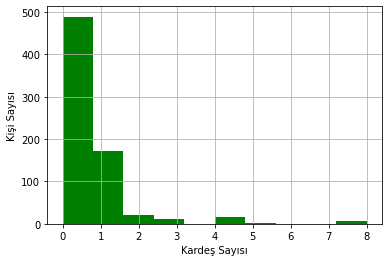

In [140]:
df_titanicMissing.SibSp.hist( facecolor='g')#son olarak yoğunluk dağılımları grafik üzerinden de incelendi
plt.xlabel('Kardeş Sayısı')
plt.ylabel('Kişi Sayısı')

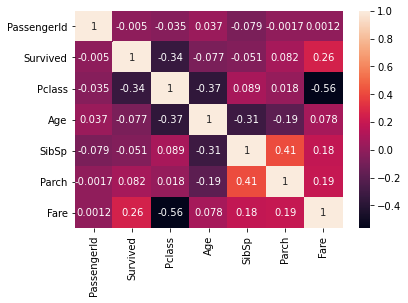

In [147]:
korelasyon =df_titanicMissing.corr()#değişkenler arasındaki korelesyon incelenerek değişkenler arasında bir ilişki kurup kurulamayacağı incelendi.
sns.heatmap(korelasyon, annot=True)
plt.show()

In [148]:
print("Sonuç olarak değişkenin nümerik olması ve dağılımın yoğun olarak bir noktada toplanmasından dolayı mean ve median değerlerinin dağılımı gerçeklikten saptıracağı düşünüldü. Aynı zamanda yoğunluğun yaşandığı değer toplama işleminde etkisiz olmasından dolayı da mean değeri kullanılmaması gerektiği düşünüldü. Bunlara ek olarak değişkenler arasında bir ilişki olup olmadığı kontrol edildi ve ilşki olmadığı dolayısıyla boşlukları doldurmada model de kullanılamayacağına karar verildi. Tüm bu sonuçlar ışığında var olan dağılımı da koruması adına boşlukları MOD ile doldurmaya karar verildi  ")

Sonuç olarak değişkenin nümerik olması ve dağılımın yoğun olarak bir noktada toplanmasından dolayı mean ve median değerlerinin dağılımı gerçeklikten saptıracağı düşünüldü. Aynı zamanda yoğunluğun yaşandığı değer toplama işleminde etkisiz olmasından dolayı da mean değeri kullanılmaması gerektiği düşünüldü. Bunlara ek olarak değişkenler arasında bir ilişki olup olmadığı kontrol edildi ve ilşki olmadığı dolayısıyla boşlukları doldurmada model de kullanılamayacağına karar verildi. Tüm bu sonuçlar ışığında var olan dağılımı da koruması adına boşlukları MOD ile doldurmaya karar verildi  


In [149]:
df_titanicMissing.SibSp.mode()

0    0.0
dtype: float64

In [189]:
df_titanicMissing_SibSp = df_titanicMissing.copy()

In [190]:
df_titanicMissing_SibSp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2,W./C. 6607,NaN,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.0000,C148,NaN


In [192]:
df_titanicMissing_SibSp.SibSp = df_titanicMissing_SibSp.SibSp.fillna(df_titanicMissing.SibSp.mode()[0])


In [193]:
df_titanicMissing_SibSp.head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0.0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,0.0,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0.0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0,237736,30.0708,NaN,C


In [153]:
df_titanicMissing1.SibSp.isnull().sum()

0

# Soru 10

Datayı baştan okuyun. Embarked değişkenini "NAN" şeklinde yeni bir kategorisi olacak şekilde doldurun.

In [195]:
df_titanicBastan = pd.read_csv("train_missing.csv")
display(df_titanicBastan)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2,W./C. 6607,NaN,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.0000,C148,NaN


In [203]:
df_titanicBastan.Embarked.fillna("NAN", inplace = True)

In [204]:
df_titanicBastan.Embarked.isnull().sum()

0

# Soru 11

"Fare" değişkeni için "Fare_Missing" adında yeni bir değişken türetip "Fare" değişkenini median ile doldurun.

In [227]:
df_titanicMissing.Fare.median()

14.45625

In [226]:
na_indices = df_titanicMissing_S[df_titanicMissing_S["Fare"].isnull()].index
na_indices

Int64Index([ 11,  12,  17,  35,  40,  45,  67,  69,  70,  97, 105, 113, 129,
            162, 166, 175, 181, 182, 193, 206, 210, 215, 229, 255, 264, 267,
            283, 296, 301, 308, 324, 332, 354, 390, 396, 404, 413, 417, 427,
            430, 436, 437, 438, 440, 443, 456, 463, 490, 494, 504, 533, 562,
            589, 596, 599, 608, 614, 617, 618, 627, 654, 659, 676, 679, 681,
            684, 690, 695, 721, 722, 729, 748, 752, 757, 763, 773, 781, 783,
            790, 794, 798, 806, 808, 822, 823, 825, 841, 863, 872, 885, 888],
           dtype='int64')

In [228]:
median = df_titanicMissing.median()
df_titanicMissing_S.fillna(value = median, inplace=True)
df_titanicMissing_S.insert(9,"Fare_Missing", 0)

In [229]:
df_titanicMissing_S

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare_Missing,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2,0,PC 17599,0,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,3,0,STON/O2. 3101282,0,7.92500,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,4,0,113803,0,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,5,0,373450,0,8.05000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,887,0,211536,0,13.00000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,888,0,112053,0,30.00000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,889,2,W./C. 6607,0,14.45625,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,890,0,111369,0,30.00000,C148,NaN


In [230]:
df_titanicMissing_S.loc[na_indices, "Fare_Missing"] = 1

In [232]:
df_titanicMissing_S
print("Not: Değişim 888 indexli satırda gözlenebilmektedir.")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare_Missing,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,7.25000,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2,0,PC 17599,0,71.28330,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,3,0,STON/O2. 3101282,0,7.92500,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,4,0,113803,0,53.10000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,5,0,373450,0,8.05000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,887,0,211536,0,13.00000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,888,0,112053,0,30.00000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,889,2,W./C. 6607,1,14.45625,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,890,0,111369,0,30.00000,C148,NaN
